# Data Cleaning, Wrangling and Visualization

 In this notebook we will be learning how to clean the data and use it for our model or write in an excel or csv file to use it for other purposes like data Visualizaton. 

In [1]:
#importing the libraries

# Pandas for managing datasets
import pandas as pd 

# Matplotlib for additional customization
from matplotlib import pyplot as plt

# Seaborn for plotting and styling
import seaborn as sb


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Seaborn comes with few datasets in the library. when seaborn is installed the datasets downlaod automatically. By using load_dataset(), we can use any of the dataset. Function load_dataset() helps

In [2]:
import seaborn as sb
print(sb.get_dataset_names()) #or print sb.get_dataset_names() or sb.get_dataset_names()

['anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'iris', 'mpg', 'planets', 'tips', 'titanic']


In [3]:
df = sb.load_dataset('planets')
df.head(2) #shows the Top 2 rows of dataframe

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008


### Checking the size of data

In [4]:
df.shape

(1035, 6)

1035 is the number of rows and 6 is the number of columns in the planets dataset

In [5]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

### Dropping columns

Deleting "method" column in planets dataset

In [6]:
df_c = df.drop(['method', 'number'], axis=1) # axis=1 means columns

In [7]:
df_c.head(2)

,orbital_period,mass,distance,year
0,269.300,7.10,77.40,2006
1,874.774,2.21,56.95,2008


In the above output we can see that the column "method" has been droped from the output

### Unique Values in Column

In [8]:
df.number.head(13)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     2
10    2
11    1
12    1
Name: number, dtype: int64

In [9]:
df.number.unique()

array([1, 2, 3, 5, 4, 6, 7])

In [10]:
df['number'].unique()

array([1, 2, 3, 5, 4, 6, 7])

In [11]:
df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

The above output shows the unique values in column "method".

In [12]:
df.method.nunique()

10

In [13]:
len(df.method.unique())

10

The number of unique values in "method" column is 10

### Column Renaming

In [14]:
df.rename(columns={'orbital_period': 'Orbital_Period'}, inplace=True)

In [15]:
df.head(2)

,method,number,Orbital_Period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008


### Replace Values

Replace function changes the values in dataframe with desired values

In [16]:
df['method'] = df['method'].replace('Radial Velocity', 'RV')

In [17]:
df.head(2)

,method,number,Orbital_Period,mass,distance,year
0,RV,1,269.300,7.10,77.40,2006
1,RV,1,874.774,2.21,56.95,2008


In the output the values have changed in the method column. 'Radial Velocity' has been changed to 'RV' in the method column.

In [18]:
df['method'] = df['method'].replace('RV','Radial Velocity')
df.head(2)

,method,number,Orbital_Period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008


### Dropping Rows if it contains a certain value

In [19]:
df_d = df[df.method != 'Radial Velocity']

In [20]:
df_d.head(2)

,method,number,Orbital_Period,mass,distance,year
29,Imaging,1,NaN,NaN,45.52,2005
30,Imaging,1,NaN,NaN,165.00,2007


In [21]:
df_d.shape

(482, 6)

In [22]:
df.shape

(1035, 6)

Rows with value Radial velocity has been deleted.

### Drop a row by row number (in this case, row 4)

#### Pandas uses zero based numbering, so 0 is the first row, 1 is the second row, etc.

In [23]:
df.head(6)

,method,number,Orbital_Period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008


In [24]:
df.drop(df.index[3]).head(5)

,method,number,Orbital_Period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008


In the above output, row number 3 has been dropped.

### Excel Writer

In [25]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Planets.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='Planets')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

### CSV Writer

In [26]:
df.to_csv('PlanestCsv.csv', sep='\t', encoding='utf-8')

### Melt Method

To make analysis of data in table easier, we can reshape the data into a more computer-friendly form using Pandas in Python. Pandas.melt() is one of the function to do so..
Pandas.melt() unpivots a DataFrame from wide format to long format.
melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.
Syntax :

### pandas.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

In [27]:
df_melt = pd.DataFrame({'Name': {0: 'Nik', 1: 'kal', 2: 'Balaji'}, 
                   'Course': {0: 'PHD', 1: 'PHD', 2: 'Masters'}, 
                   'Age': {0: 27, 1: 23, 2: 21}}) 

In [28]:
df_melt

,Age,Course,Name
0,27,PHD,Nik
1,23,PHD,kal
2,21,Masters,Balaji


In [29]:
pd.melt(df_melt, id_vars=['Name'], value_vars=['Course'])

,Name,variable,value
0,Nik,Course,PHD
1,kal,Course,PHD
2,Balaji,Course,Masters


In [30]:
# multiple unpivot columns 
pd.melt(df_melt, id_vars =['Name'], value_vars =['Course', 'Age'])

,Name,variable,value
0,Nik,Course,PHD
1,kal,Course,PHD
2,Balaji,Course,Masters
3,Nik,Age,27
4,kal,Age,23
5,Balaji,Age,21


In [31]:
# Names of ‘variable’ and ‘value’ columns can be customized 
pd.melt(df_melt, id_vars =['Name'], value_vars =['Course'], 
              var_name ='NAMEChanged', value_name ='COURSEchanged') 


,Name,NAMEChanged,COURSEchanged
0,Nik,Course,PHD
1,kal,Course,PHD
2,Balaji,Course,Masters


### Joining(Merging) DataFrames

Using the [MovieLens 100k data](http://grouplens.org/datasets/movielens/), let's create two DataFrames:

- **movies**: shows information about movies, namely a unique **movie_id** and its **title**
- **ratings**: shows the **rating** that a particular **user_id** gave to a particular **movie_id** at a particular **timestamp**

#### Movies

In [32]:
table_data = 'u.item'
movie_cols = ['movie_id', 'title']
movies = pd.read_table(table_data, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin-1')
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Ratings

In [33]:
table_data = 'u.data'
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(table_data, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [34]:
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


- Pandas noticed that movies and ratings had one column in common, namely **movie_id**. This is the "key" on which the DataFrames will be joined.
- The first **movie_id** in movies is 1. Thus, Pandas looked through every row in the ratings DataFrame, searching for a movie_id of 1. Every time it found such a row, it recorded the **user_id**, **rating**, and **timestamp** listed in that row. In this case, it found 452 matching rows.
- The second **movie_id** in movies is 2. Again, Pandas did a search of ratings and found 131 matching rows.
- This process was repeated for all of the remaining rows in movies.

At the end of the process, the movie_ratings DataFrame is created, which contains the two columns from movies (**movie_id** and **title**) and the three other colums from ratings (**user_id**, **rating**, and **timestamp**).

- **movie_id** 1 and its **title** are listed 452 times, next to the **user_id**, **rating**, and **timestamp** for each of the 452 matching ratings.
- **movie_id** 2 and its **title** are listed 131 times, next to the **user_id**, **rating**, and **timestamp** for each of the 131 matching ratings.
- And so on, for every movie in the dataset.

In [35]:
print(movies.shape)
print(ratings.shape)
print(movie_ratings.shape)

(1682, 2)
(100000, 4)
(100000, 5)


### Four Types of Joins

There are actually four types of joins supported by the Pandas `merge` function. Here's how they are described by the documentation:

- **inner:** use intersection of keys from both frames (SQL: inner join)
- **outer:** use union of keys from both frames (SQL: full outer join)
- **left:** use only keys from left frame (SQL: left outer join)
- **right:** use only keys from right frame (SQL: right outer join)

The default is the "inner join", which was used when creating the movie_ratings DataFrame.

It's easiest to understand the different types by looking at some simple examples:

#### Example DataFrames data1 and data2

In [36]:
data1 = pd.DataFrame({'Name': {0: 'Nik', 1: 'kal', 2: 'Balaji', 3: 'Samuel'}, 
                   'Course': {0: 'PHD', 1: 'PHD', 2: 'Masters', 3: 'PHD'}, 
                   'Age': {0: 27, 1: 23, 2: 21, 3: 25}}) 
data1

,Age,Course,Name
0,27,PHD,Nik
1,23,PHD,kal
2,21,Masters,Balaji
3,25,PHD,Samuel


In [37]:
data2 = pd.DataFrame({'Name': {0: 'Nik', 1: 'kal', 2: 'Balaji', 3:'Yusuf'}, 
                   'Teaching_Rating': {0: 'Amazing', 1: 'Excellent', 2: 'Good', 3:'Excellent'}})
data2

,Name,Teaching_Rating
0,Nik,Amazing
1,kal,Excellent
2,Balaji,Good
3,Yusuf,Excellent


### Left MERGE or Left Join

Include all observations found in data1:

In [38]:
 pd.merge(data1,data2, how='left', on='Name')

,Age,Course,Name,Teaching_Rating
0,27,PHD,Nik,Amazing
1,23,PHD,kal,Excellent
2,21,Masters,Balaji,Good
3,25,PHD,Samuel,NaN


### Right MERGE or Right Join

Include all observations found in data2:

In [39]:
 pd.merge(data1,data2, how='right', on='Name')

,Age,Course,Name,Teaching_Rating
0,27.0,PHD,Nik,Amazing
1,23.0,PHD,kal,Excellent
2,21.0,Masters,Balaji,Good
3,NaN,NaN,Yusuf,Excellent


### Inner MERGE or Inner JOIN

Only include observations found in both data1 and data2:

In [40]:
 pd.merge(data1,data2, how='inner', on='Name')

,Age,Course,Name,Teaching_Rating
0,27,PHD,Nik,Amazing
1,23,PHD,kal,Excellent
2,21,Masters,Balaji,Good


### Outer MERGE or Outer Join

Include observations found in either data1 or data2:

In [41]:
 pd.merge(data1,data2, how='outer', on='Name')

,Age,Course,Name,Teaching_Rating
0,27.0,PHD,Nik,Amazing
1,23.0,PHD,kal,Excellent
2,21.0,Masters,Balaji,Good
3,25.0,PHD,Samuel,NaN
4,NaN,NaN,Yusuf,Excellent


### Checking Missing Values

In [42]:
df.head(8)

,method,number,Orbital_Period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996


In [43]:
df.isnull().values.any()

True

In [44]:
df.isnull().sum()

method              0
number              0
Orbital_Period     43
mass              522
distance          227
year                0
dtype: int64

The above output shows that column "orbital_period"has 43 missing values, "mass" column has 522 null values and "distance" column has 227 values.

### Filling Missing values with mean values of that column

In [45]:
df.mean()

number               1.785507
Orbital_Period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [46]:
df.fillna(df.mean(), inplace=True)

,method,number,Orbital_Period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.40,2006
1,Radial Velocity,1,874.774000,2.210000,56.95,2008
2,Radial Velocity,1,763.000000,2.600000,19.84,2011
3,Radial Velocity,1,326.030000,19.400000,110.62,2007
4,Radial Velocity,1,516.220000,10.500000,119.47,2009
5,Radial Velocity,1,185.840000,4.800000,76.39,2008
6,Radial Velocity,1,1773.400000,4.640000,18.15,2002
7,Radial Velocity,1,798.500000,2.638161,21.41,1996
8,Radial Velocity,1,993.300000,10.300000,73.10,2008
9,Radial Velocity,2,452.800000,1.990000,74.79,2010


In [47]:
df.head(8)

,method,number,Orbital_Period,mass,distance,year
0,Radial Velocity,1,269.300,7.100000,77.40,2006
1,Radial Velocity,1,874.774,2.210000,56.95,2008
2,Radial Velocity,1,763.000,2.600000,19.84,2011
3,Radial Velocity,1,326.030,19.400000,110.62,2007
4,Radial Velocity,1,516.220,10.500000,119.47,2009
5,Radial Velocity,1,185.840,4.800000,76.39,2008
6,Radial Velocity,1,1773.400,4.640000,18.15,2002
7,Radial Velocity,1,798.500,2.638161,21.41,1996


In [48]:
df = sb.load_dataset('planets') #loading the dataset again to reset the values

In [49]:
#Filling missing values with 0
df_zero = df.fillna(0) #Instead of mean we can also replace it with by zero
df_zero.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,0.00,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


### Stack/ Unstack

For more information please read https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html

In [50]:
df_stack = pd.DataFrame([[180, 6.1], [25, 1]],
                                     index=['Goku', 'Pikachu'],
                                     columns=['weight', 'height'])
df_stack

,weight,height
Goku,180,6.1
Pikachu,25,1.0


In [51]:
stacked = df_stack.stack()
stacked

Goku     weight    180.0
         height      6.1
Pikachu  weight     25.0
         height      1.0
dtype: float64

In [52]:
stacked.unstack()

,weight,height
Goku,180.0,6.1
Pikachu,25.0,1.0


### Grouping

In [53]:
import numpy as np
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.491532,0.764729
1,bar,one,-0.819604,0.207839
2,foo,two,0.861707,-0.347846
3,bar,three,-1.825695,1.570092
4,foo,two,-1.004447,-0.855928
5,bar,two,1.163657,1.274329
6,foo,one,-1.231813,-0.098475
7,foo,three,0.129187,1.129683


In [54]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.819604  0.207839
    three -1.825695  1.570092
    two    1.163657  1.274329
foo one   -0.740280  0.666254
    three  0.129187  1.129683
    two   -0.142740 -1.203775

## Advanced Indexing

  ### Setting/Resetting Index

In [55]:
data1

,Age,Course,Name
0,27,PHD,Nik
1,23,PHD,kal
2,21,Masters,Balaji
3,25,PHD,Samuel


In [56]:
data1.set_index('Name')

,Age,Course
Name,,
Nik,27,PHD
kal,23,PHD
Balaji,21,Masters
Samuel,25,PHD


In [57]:
data1.reset_index()

,index,Age,Course,Name
0,0,27,PHD,Nik
1,1,23,PHD,kal
2,2,21,Masters,Balaji
3,3,25,PHD,Samuel


### Pandas DataType and Shape

In [58]:
df = pd.read_csv('drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


For each of the following lines of code:

- What the **data type** of the object that is returned?
- What is the **shape** of the object that is returned?


1. `df`
2. `df.continent`
3. `df['continent']`
4. `df[['country', 'continent']]`
5. `df[[False, True, False, True, False]]`

#### 1. DataType and Shape of df

In [59]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [60]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(193, 6)


#### 2. DataType and Shape of df.continent

In [61]:
df.continent.head()

0    AS
1    EU
2    AF
3    EU
4    AF
Name: continent, dtype: object

In [62]:
print(type(df.continent))
print(df.continent.shape)

<class 'pandas.core.series.Series'>
(193,)


#### 3. DataType and Shape of df['continent']

In [63]:
df['continent'].head()

0    AS
1    EU
2    AF
3    EU
4    AF
Name: continent, dtype: object

In [64]:
print(type(df['continent']))
print(df['continent'].shape)

<class 'pandas.core.series.Series'>
(193,)


#### 4. DataType and Shape of df[['country', 'continent']]

In [65]:
df[['country', 'continent']].head()

,country,continent
0,Afghanistan,AS
1,Albania,EU
2,Algeria,AF
3,Andorra,EU
4,Angola,AF


In [66]:
print(type(df[['country', 'continent']]))
print(df[['country', 'continent']].shape)

<class 'pandas.core.frame.DataFrame'>
(193, 2)


In [67]:
# equivalent
cols = ['country', 'continent']
df[cols].head()

,country,continent
0,Afghanistan,AS
1,Albania,EU
2,Algeria,AF
3,Andorra,EU
4,Angola,AF


#### 5. DataType and Shape of df[[False, True, False, True, False]]

In [68]:
import random
b=list(np.random.randint(2, size=df.shape[0]))
b[:9]

[0, 0, 1, 0, 0, 0, 1, 0, 0]

In [69]:
choices=[bool(x) for x in b]


In [70]:
choices[:9]

[False, False, True, False, False, False, True, False, False]

In [71]:
df[choices]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
6,Argentina,193,25,221,8.3,SA
9,Austria,279,75,191,9.7,EU
12,Bahrain,42,63,7,2.0,AS
15,Belarus,142,373,42,14.4,EU
17,Belize,263,114,8,6.8,NaN
18,Benin,34,4,13,1.1,AF
20,Bolivia,167,41,8,3.8,SA
21,Bosnia-Herzegovina,76,173,8,4.6,EU
22,Botswana,173,35,35,5.4,AF


In [72]:
df[choices].shape

(86, 6)

In [73]:
# Look for EU
df[df.continent=='EU']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


### Visualization with Pandas (and Matplotlib)

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [75]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [76]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [77]:
# read in the drinks data
numeric_drink_cols = ['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']
drinks_numeric = df[numeric_drink_cols]
drinks_numeric.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


## Histogram: show the distribution of a numerical variable

In [78]:
# sort the beer column 
beer_servings_numbers=drinks_numeric.beer_servings.sort_index().values
beer_servings_numbers

array([  0,  89,  25, 245, 217, 102, 193,  21, 261, 279,  21, 122,  42,
         0, 143, 142, 295, 263,  34,  23, 167,  76, 173, 245,  31, 231,
        25,  88,  37, 144,  57, 147, 240,  17,  15, 130,  79, 159,   1,
        76,   0, 149, 230,  93, 192, 361,   0,  32, 224,  15,  52, 193,
       162,   6,  52,  92,  18, 224,  20,  77, 263, 127, 347,   8,  52,
       346,  31, 133, 199,  53,   9,  28,  93,   1,  69, 234, 233,   9,
         5,   0,   9, 313,  63,  85,  82,  77,   6, 124,  58,  21,   0,
        31,  62, 281,  20,  82,  19,   0, 343, 236,  26,   8,  13,   0,
         5, 149,   0,   0,  98, 238,  62,   0,  77,  31,  12,  47,   5,
       376,  49,   5, 251, 203,  78,   3,  42, 188, 169,  22,   0, 306,
       285,  44, 213, 163,  71, 343, 194,   1, 140, 109, 297, 247,  43,
       194, 171, 120, 105,   0,  56,   0,   9, 283, 157,  25,  60, 196,
       270,  56,   0, 225, 284,  16,   8, 128,  90, 152, 185,   5,   2,
        99, 106,   1,  36,  36, 197,  51,  51,  19,   6,  45, 20

(array([ 72.,  24.,  23.,  15.,  10.,  17.,  15.,   8.,   3.,   6.]),
 array([   0. ,   37.6,   75.2,  112.8,  150.4,  188. ,  225.6,  263.2,
         300.8,  338.4,  376. ]),
 <a list of 10 Patch objects>)

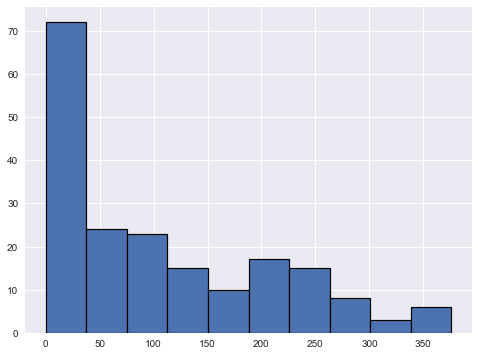

In [79]:
plt.hist(beer_servings_numbers, edgecolor='black', linewidth=1.2)

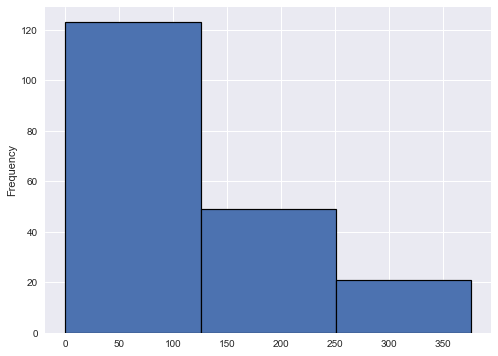

In [80]:
# compare with histogram
drinks_numeric.beer_servings.plot(kind='hist', edgecolor='black', linewidth=1.2,bins=3)

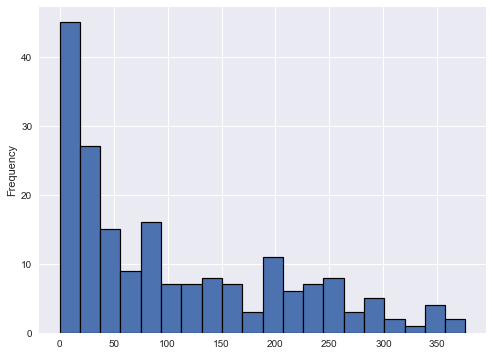

In [81]:
# try more bins
drinks_numeric.beer_servings.plot(kind='hist', edgecolor='black', linewidth=1.2, bins=20)

Text(0,0.5,'Frequency')

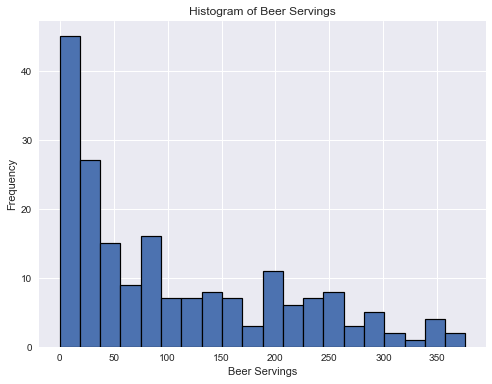

In [82]:
# add title and labels
drinks_numeric.beer_servings.plot(kind='hist', bins=20, title='Histogram of Beer Servings',edgecolor='black', linewidth=1.2)
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')

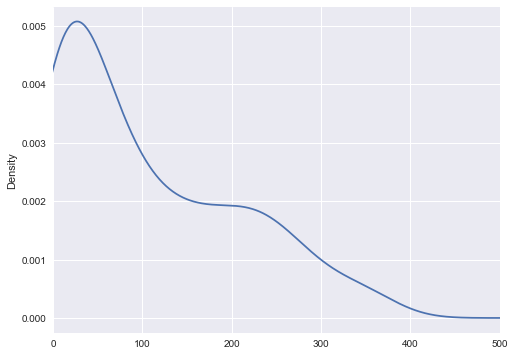

In [83]:
# compare with density plot (smooth version of a histogram)
drinks_numeric.beer_servings.plot(kind='density', xlim=(0, 500))

### Scatter Plot: show the relationship between two numerical variables

In [84]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [85]:
# select the beer and wine columns and sort by beer
df[['beer_servings','wine_servings']].sort_values('beer_servings').values

array([[  0,   0],
       [  0,  74],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  0,   0],
       [  1,   7],
       [  1,   1],
       [  1,   4],
       [  1,   1],
       [  2,   0],
       [  3,   1],
       [  5,   0],
       [  5,   0],
       [  5,  16],
       [  5,   1],
       [  5,   0],
       [  6,   1],
       [  6,   0],
       [  6,   1],
       [  6,   9],
       [  8,   0],
       [  8,   1],
       [  8,   1],
       [  9,   2],
       [  9,   0],
       [  9,   7],
       [  9,   0],
       [ 12,  10],
       [ 13,   0],
       [ 15,   3],
       [ 15,   1],
       [ 16,   5],
       [ 16,   0],
       [ 17,   1],
       [ 18,   0],
       [ 19,  32],
       [ 19,   2],
       [ 20,   0],
       [ 20,  31],
       [ 21,  11],
       [ 21,  11],
       [ 21,   5],
       [ 21,

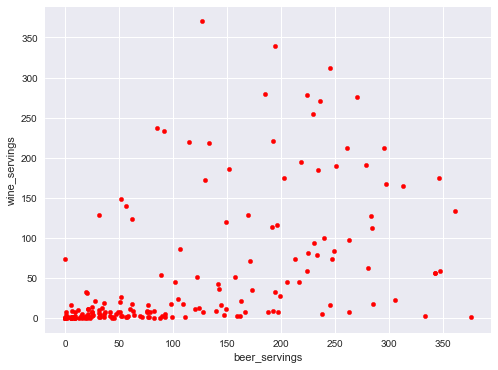

In [86]:
# compare with scatter plot
df.plot(kind='scatter', x='beer_servings', y='wine_servings', color= 'red')

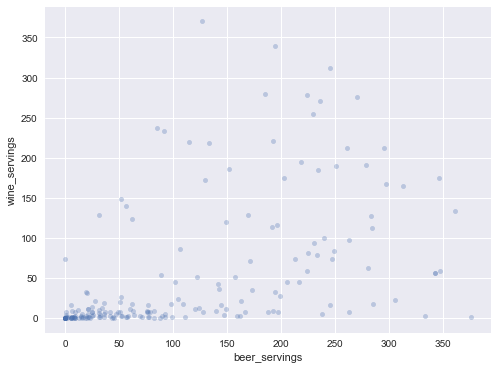

In [87]:
# add transparency
df.plot(kind='scatter', x='beer_servings', y='wine_servings', alpha=0.3)

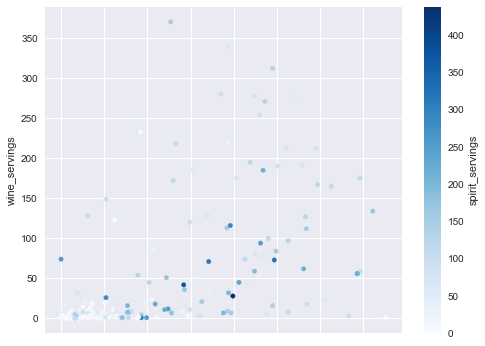

In [88]:
# vary point color by spirit servings
df.plot(kind='scatter', x='beer_servings', y='wine_servings', c='spirit_servings', colormap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11acb7ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11af3d080>]], dtype=object)

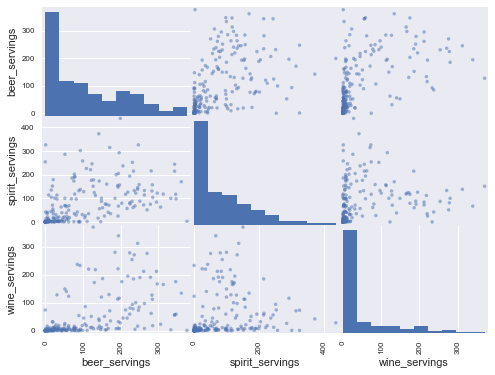

In [89]:
# scatter matrix of three numerical columns
pd.scatter_matrix(df[['beer_servings', 'spirit_servings', 'wine_servings']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b02dd68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b28f978>]], dtype=object)

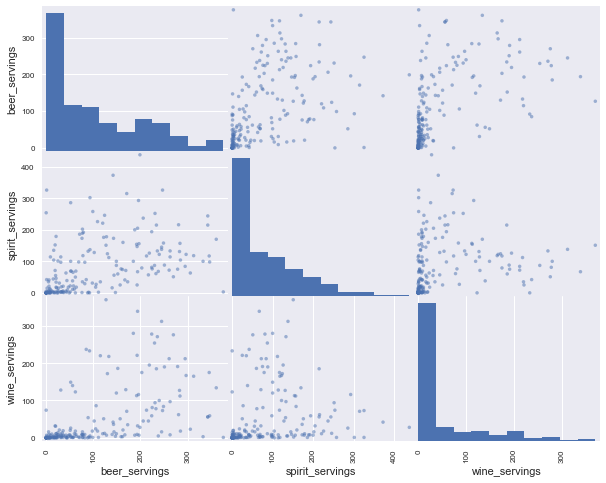

In [90]:
# increase figure size
pd.scatter_matrix(df[['beer_servings', 'spirit_servings', 'wine_servings']], figsize=(10, 8))

## Bar Plot: show a numerical comparison across different categories

In [91]:
# count the number of countries in each continent
df.continent.value_counts()

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

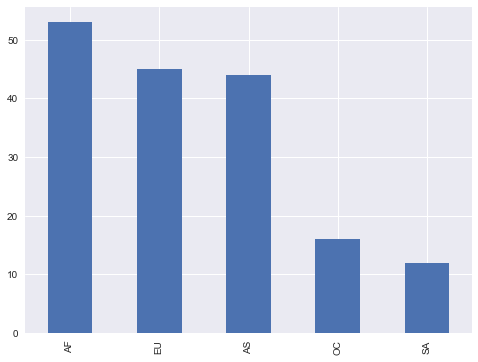

In [92]:
# compare with bar plot
df.continent.value_counts().plot(kind='bar')

In [93]:
# calculate the mean alcohol amounts for each continent
df.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


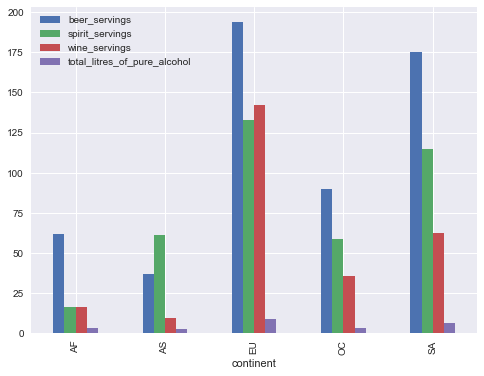

In [94]:
# side-by-side bar plots
df.groupby('continent').mean().plot(kind='bar')

In [95]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

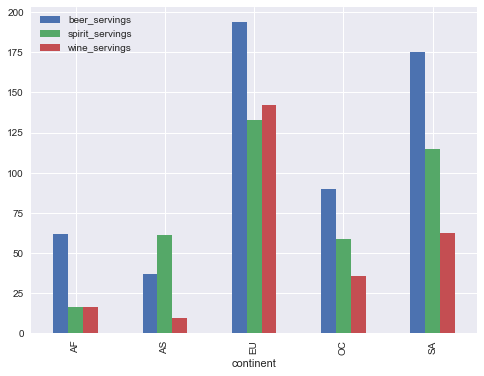

In [96]:
# drop the liters column
df.groupby('continent').mean().drop('total_litres_of_pure_alcohol', axis=1).plot(kind='bar')

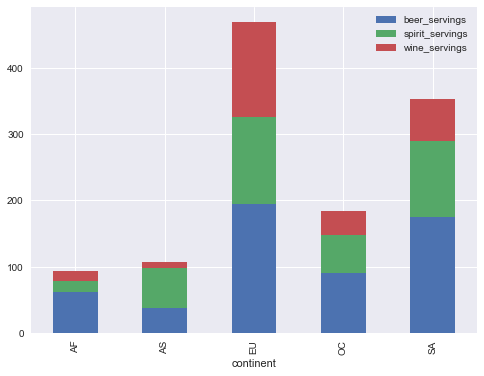

In [97]:
# stacked bar plots
df.groupby('continent').mean().drop('total_litres_of_pure_alcohol', axis=1).plot(kind='bar', stacked=True)

## Box Plot: show quartiles (and outliers) for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

In [98]:
# sort the spirit column
df.spirit_servings.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   2,
         3,   3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   5,   5,
         6,   6,   6,   7,   9,  11,  11,  12,  13,  15,  15,  16,  16,
        18,  18,  18,  18,  19,  21,  21,  22,  22,  25,  25,  27,  29,
        31,  31,  34,  35,  35,  35,  35,  38,  39,  41,  41,  42,  42,
        44,  46,  50,  51,  55,  56,  57,  60,  61,  63,  63,  65,  67,
        68,  69,  69,  69,  71,  71,  72,  74,  75,  76,  76,  79,  81,
        84,  87,  87,  88,  97,  97,  98,  98, 100, 100, 100, 100, 101,
       104, 104, 112, 114, 114, 114, 117, 117, 118, 118, 122, 122, 124,
       126, 128, 131, 132, 133, 133, 135, 137, 138, 145, 147, 151, 152,
       154, 156, 157, 158, 160, 170, 173, 173, 176, 178, 179, 186, 189,
       192, 194, 200, 202, 205, 215, 215, 216, 221, 226, 237, 24

In [99]:
# show "five-number summary" for spirit
df.spirit_servings.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit_servings, dtype: float64

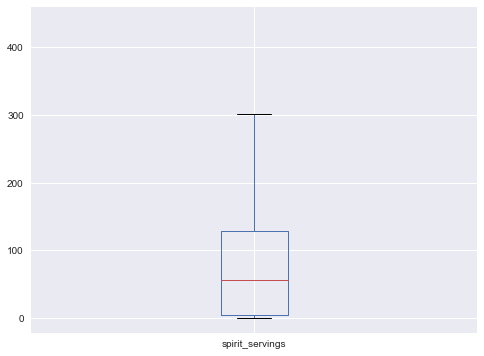

In [100]:
# compare with box plot
df.spirit_servings.plot(kind='box')

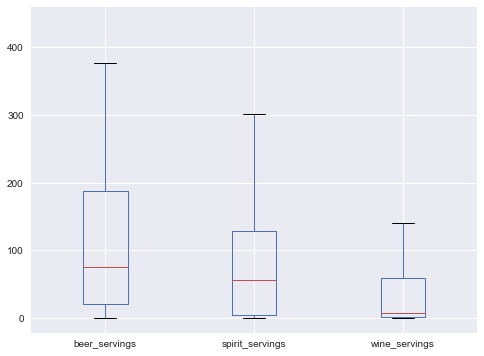

In [101]:
# include multiple variables
df.drop('total_litres_of_pure_alcohol', axis=1).plot(kind='box')

## Line Plot: show the trend of a numerical variable over time

In [102]:
# read in the ufo data
ufo = pd.read_csv('ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [103]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

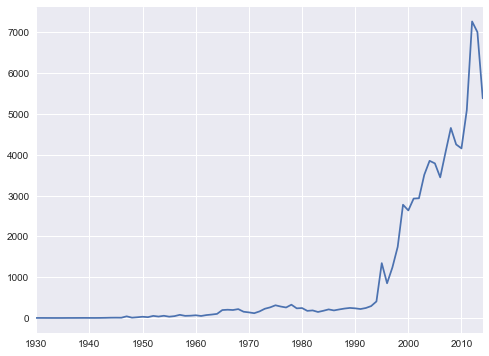

In [104]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot()

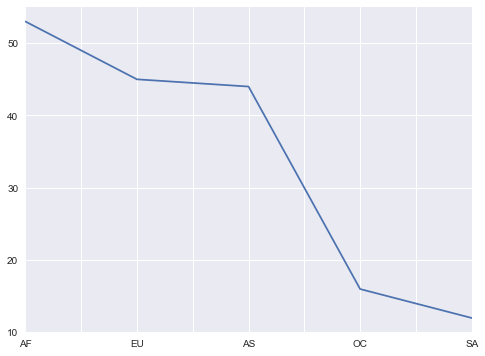

In [105]:
# don't use a line plot when there is no logical ordering
df.continent.value_counts().plot()

## Grouped Box Plots: show one box plot for each group

In [106]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

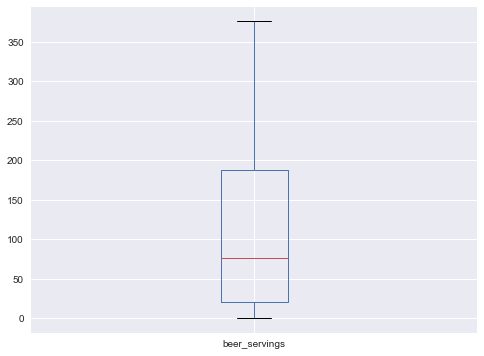

In [107]:
# reminder: box plot of beer servings
df.beer_servings.plot(kind='box')

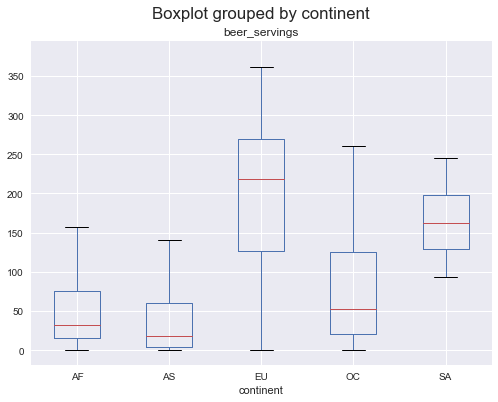

In [108]:
# box plot of beer servings grouped by continent
df.boxplot(column='beer_servings', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d190d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d11b780>]], dtype=object)

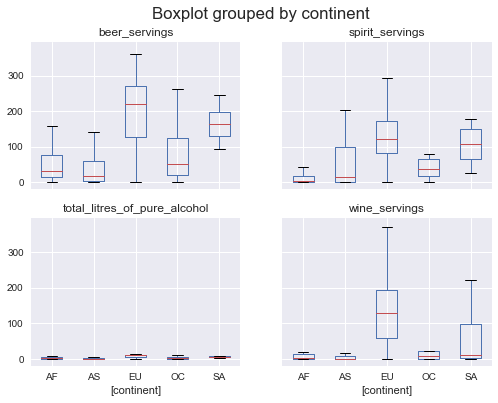

In [109]:
# box plot of all numeric columns grouped by continent
df.boxplot(by='continent')

## Grouped Box Plots: show one box plot for each group

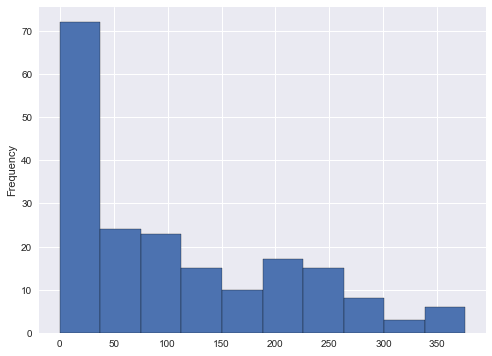

In [110]:
# reminder: histogram of beer servings
df.beer_servings.plot(kind='hist',edgecolor= 'black')

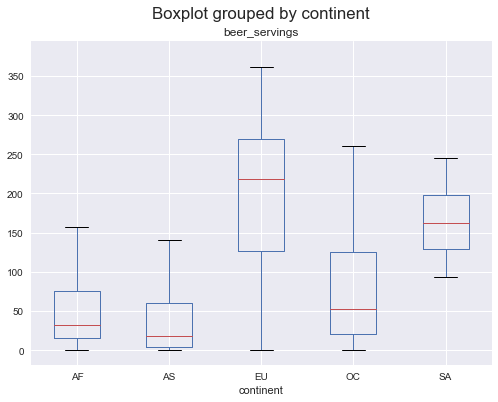

In [111]:
# box plot of beer servings grouped by continent
df.boxplot(column='beer_servings', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c2a0828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cbd55c0>]], dtype=object)

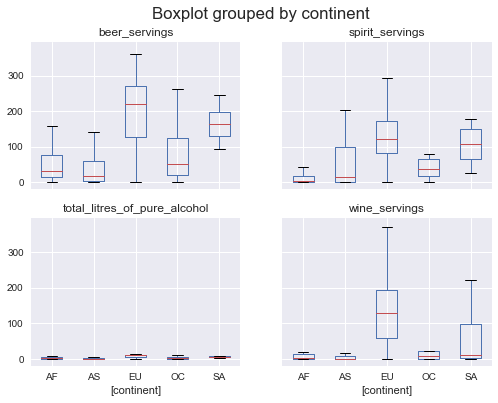

In [112]:
# box plot of all numeric columns grouped by continent
df.boxplot(by='continent')

### Grouped Histograms: show one histogram for each group

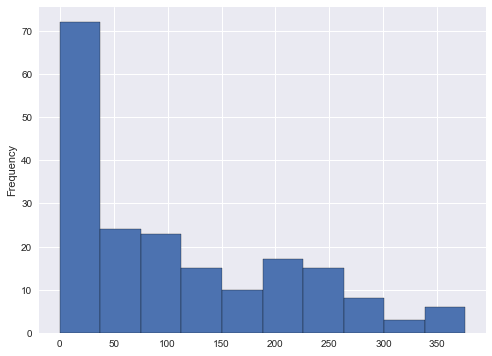

In [113]:
# reminder: histogram of beer servings
df.beer_servings.plot(kind='hist', edgecolor= 'black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d0775c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d539978>]], dtype=object)

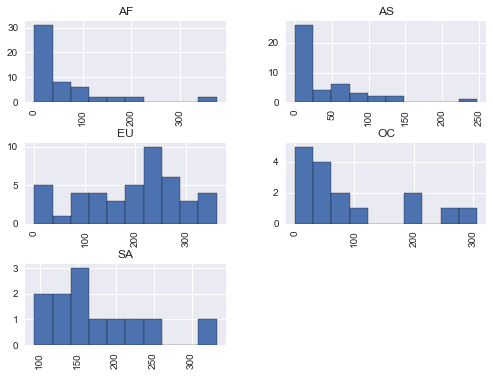

In [114]:
# histogram of beer servings grouped by continent
df.hist(column='beer_servings', by='continent', edgecolor = 'black')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d5e3a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d7f8400>]], dtype=object)

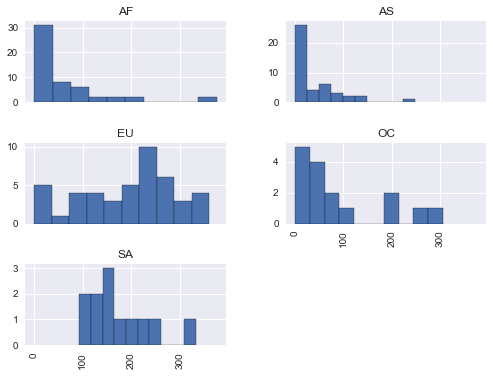

In [115]:
# share the x axes
df.hist(column='beer_servings', by='continent', edgecolor= 'black', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d94a8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11dae91d0>]], dtype=object)

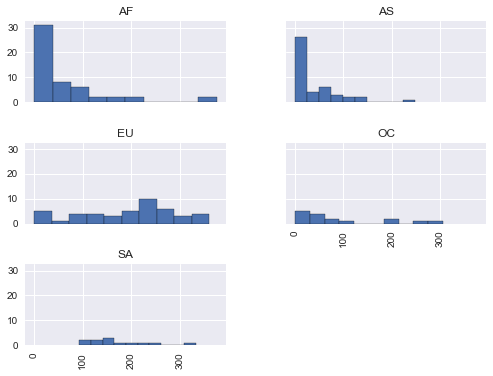

In [116]:
# share the x and y axes
df.hist(column='beer_servings', by='continent', edgecolor = 'black', sharex=True, sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dcc8eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11de22470>]], dtype=object)

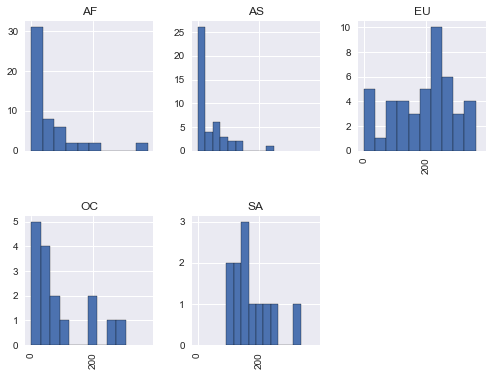

In [117]:
# change the layout
df.hist(column='beer_servings', by='continent', sharex=True, layout=(2, 3), edgecolor = 'black')

### Assorted Functionality

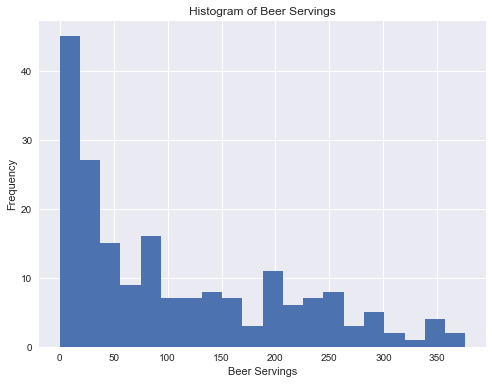

In [118]:
# saving a plot to a file
df.beer_servings.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram.png')

In [119]:
# list available plot styles
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [120]:
# change to a different style
plt.style.use('ggplot')

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)

## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [121]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [122]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)
print(a)
print (b)
print (c)
a=a+1
print(a)
a=a*3
print(a)

[ 0.  0.  0.]
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
[[[9 4 8 3]
  [4 9 7 9]
  [6 3 5 5]]

 [[6 3 8 4]
  [8 4 4 4]
  [4 7 7 8]]]
[ 1.  1.  1.]
[ 3.  3.  3.]


In [123]:
# Note the way each array is printed:
a,b,c,d

(array([ 3.,  3.,  3.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[9, 4, 8, 3],
         [4, 9, 7, 9],
         [6, 3, 5, 5]],
 
        [[6, 3, 8, 4],
         [8, 4, 4, 4],
         [4, 7, 7, 8]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [124]:
## Arithmetic in arrays is element wise
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

array([0, 1, 2, 3])

In [125]:
c = a-b
c

array([20, 29, 38, 47])

In [126]:
b**2

array([0, 1, 4, 9])

## Indexing, Slicing and Iterating

In [127]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [128]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [129]:
a[2:5]
print(a[-1])

81


In [130]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0
b = np.random.randint(1,100,(4,4))

In [131]:
b=np.array([[34, 80, 40, 46],
       [93,  9, 55,  7],
       [ 4, 23,  7, 44],
       [15, 54, 26, 38]])

In [132]:
# Guess the output
#print(b[2,3])
# print(b[0,0])
print(b)
print(b[1,2])

[[34 80 40 46]
 [93  9 55  7]
 [ 4 23  7 44]
 [15 54 26 38]]
55


In [133]:
print(b[0:3,0:2])

[[34 80]
 [93  9]
 [ 4 23]]


In [134]:
b[1:3,:]

array([[93,  9, 55,  7],
       [ 4, 23,  7, 44]])